# Project Python Foundations: FoodHub Data Analysis

**Marks: 60 points**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are a Data Scientist at Foodhub and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned. Read along carefully to complete the project.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. Please replace the blank with the right code snippet. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw an error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* You can the results/observations derived from the analysis here and use them to create your final presentation.


### Let us start by importing the required libraries

In [306]:
# Import libraries for data manipulation
import numpy as np
import pandas as pd

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [267]:
### Understanding the structure of the data

In [307]:
# Read the data
path = r"C:\Users\rolak\Downloads\foodhub_order.csv"

df = pd.read_csv(path) ## Fill the blank to read the data
# Returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [308]:
# Check the shape of the dataset
df.shape ## Fill in the blank

(1898, 9)

There are 1898 rows and 9 columns

### **Question 2:** What are the datatypes of the different columns in the dataset? [0.5 mark]

In [309]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method.  [1 Mark]

In [310]:
# Checking for missing values in the data
df.isnull().sum()  #Write the appropriate function to print the sum of null values for each column

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

There are no mssing values in the data 

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [272]:
# Get the summary statistics of the numerical data
df.describe(include="all").T ## Write the appropriate function to print the statitical summary of the data (Hint - you have seen this in the case studies before)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


### Minimum time = 20.00
### Average time = 27.00
### Maximum time = 35.00

### **Question 5:** How many orders are not rated? [1 mark]

In [273]:
df['rating'].value_counts() ## Complete the code

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

There are 736 orders not rated 

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

#### Order ID

In [312]:
# check unique order ID
df['order_id'].unique()

array([1477147, 1477685, 1477070, ..., 1477819, 1477513, 1478056],
      dtype=int64)

#### Customer ID

In [313]:
# check unique customer ID
df['customer_id'].nunique() ## Complete the code to find out number of unique Customer ID

1200

#### Restaurant name

In [314]:
# check unique Restaurant Name
df['restaurant_name'].nunique()  ## Complete the code to find out number of unique Restaurant Name

178

#### Cuisine type

In [315]:
# Check unique cuisine type
df['cuisine_type'].nunique() ## Complete the code to find out  number of  unique cuisine type

14

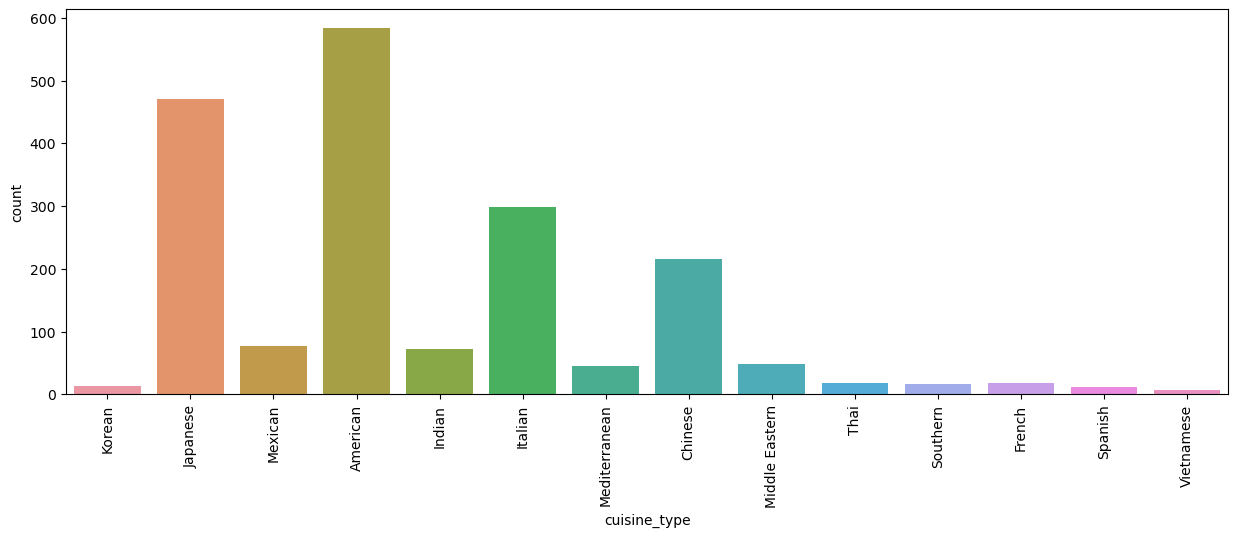

In [316]:
plt.figure(figsize = (15,5))
sns.countplot(data = df, x = 'cuisine_type') ## Create a countplot for cuisine type.
plt.xticks(rotation=90)
plt.show()

#### Cost of the order

C:\Users\rolak\anaconda3\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


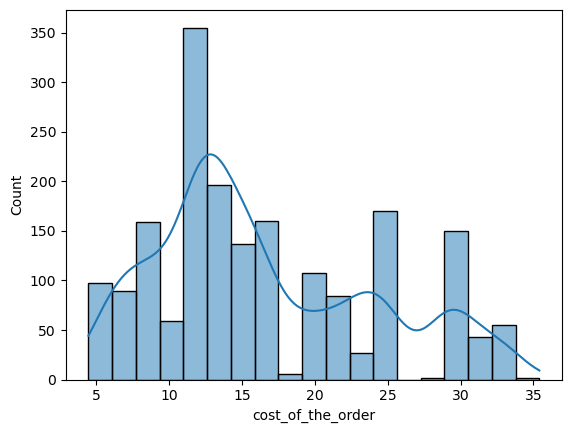

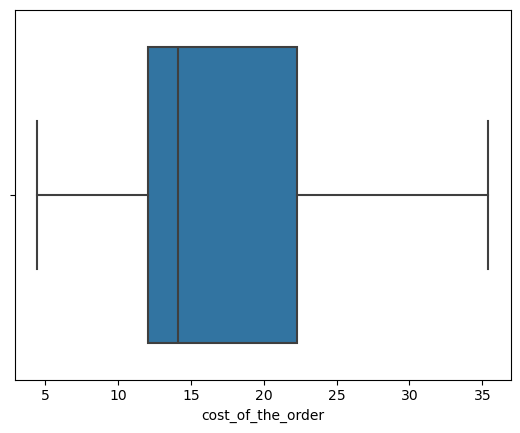

In [317]:
sns.histplot(data=df,x='cost_of_the_order' ,kde = True) ## Histogram for the cost of order
plt.show()
sns.boxplot(data=df,x='cost_of_the_order') ## Boxplot for the cost of order
plt.show()

#### Day of the week

In [318]:
# # Check the unique values
df['day_of_the_week'].unique() ## Complete the code to check unique values for the 'day_of_the_week' column

array(['Weekend', 'Weekday'], dtype=object)

<Axes: xlabel='day_of_the_week', ylabel='count'>

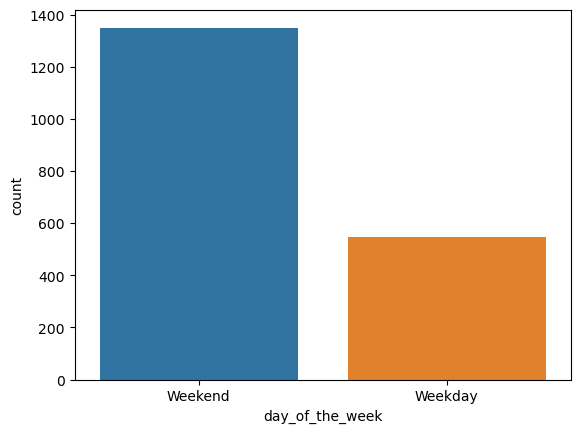

In [281]:
sns.countplot(data = df, x = 'day_of_the_week') ## Complete the code to plot a bar graph for 'day_of_the_week' column

#### Rating

In [319]:
# Check the unique values
df['rating'].unique() ## Complete the code to check unique values for the 'rating' column

array(['Not given', '5', '3', '4'], dtype=object)

<Axes: xlabel='rating', ylabel='count'>

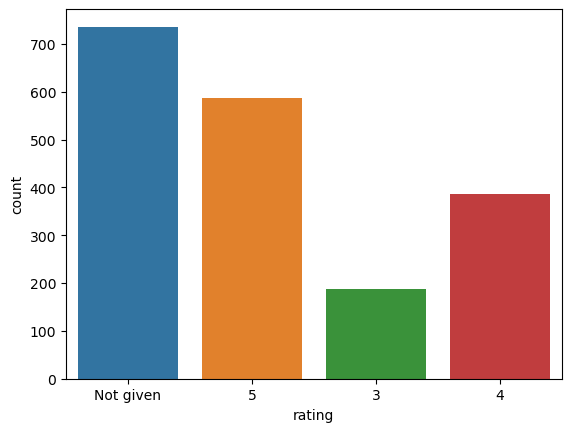

In [320]:
sns.countplot(data = df, x = "rating")  ## Complete the code to plot bar graph for 'rating' column

#### Food Preparation time

C:\Users\rolak\anaconda3\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


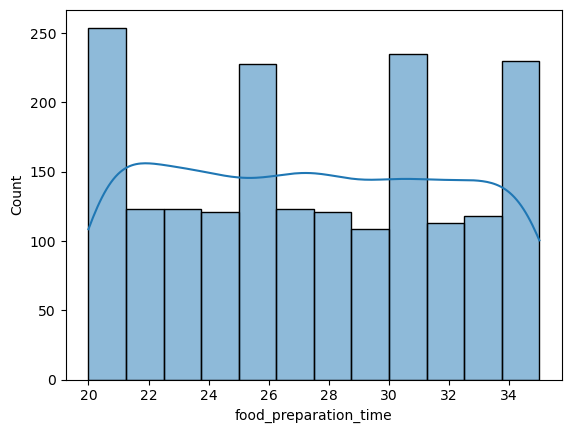

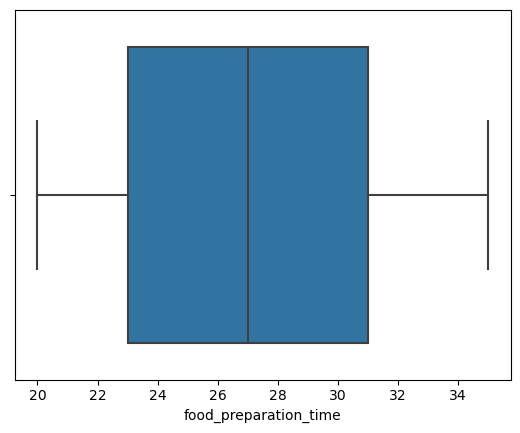

In [321]:
sns.histplot(data=df,x='food_preparation_time', kde = True) ## Complete the code to plot the histogram for the cost of order
plt.show()
sns.boxplot(data=df,x='food_preparation_time') ## Complete the code to plot the boxplot for the cost of order
plt.show()

#### Delivery time

C:\Users\rolak\anaconda3\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


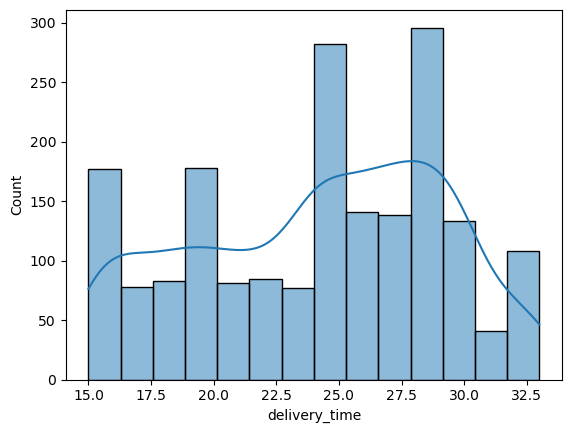

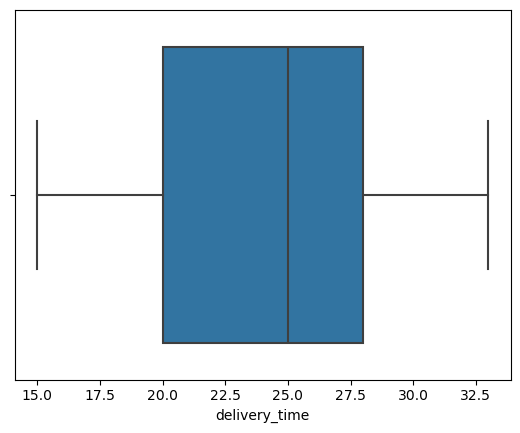

In [322]:
sns.histplot(data=df,x='delivery_time', kde = True ) ## Complete the code to plot the histogram for the delivery time
plt.show()
sns.boxplot(data=df,x='delivery_time') ## Complete the code to plot the boxplot for the delivery time
plt.show()

### **Question 7:** Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [325]:
# Get top 5 restaurants with highest number of orders
df['restaurant_name'].value_counts().head(5) ## Complete the code

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64

### **Question 8:** Which is the most popular cuisine on weekends? [1 mark]

In [326]:
# Get most popular cuisine on weekends
df_weekend = df[df['day_of_the_week'] == 'Weekend']
df_weekend['cuisine_type'].value_counts() ## Complete the code to check unique values for the cuisine type on weekend

cuisine_type
American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: count, dtype: int64

### **Question 9:** What percentage of the orders cost more than 20 dollars? [2 marks]


In [327]:
# Get orders that cost above 20 dollars
df_greater_than_20 = df[df['cost_of_the_order']>20] ## Write the appropriate column name to get the orders having cost above $20

# Calculate the number of total orders where the cost is above 20 dollars
print('The number of total orders that cost above 20 dollars is:', df_greater_than_20.shape[0])

# Calculate percentage of such orders in the dataset
percentage = (df_greater_than_20.shape[0] / df.shape[0]) * 100

print("Percentage of orders above 20 dollars:", round(percentage, 2), '%')

The number of total orders that cost above 20 dollars is: 555
Percentage of orders above 20 dollars: 29.24 %


### **Question 10:** What is the mean order delivery time? [1 mark]

In [328]:
# Get the mean delivery time
mean_del_time = df['delivery_time'].mean()  ## Write the appropriate function to obtain the mean delivery time

print('The mean delivery time for this dataset is', round(mean_del_time, 2), 'minutes')

The mean delivery time for this dataset is 24.16 minutes


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [329]:
# Get the counts of  each customer_id
df['customer_id'].value_counts().head(3)  ## Write the appropriate column name to get the top 5 cmost frequent customers

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64

### Multivariate Analysis

### **Question 12:** Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]

#### Cuisine vs Cost of the order

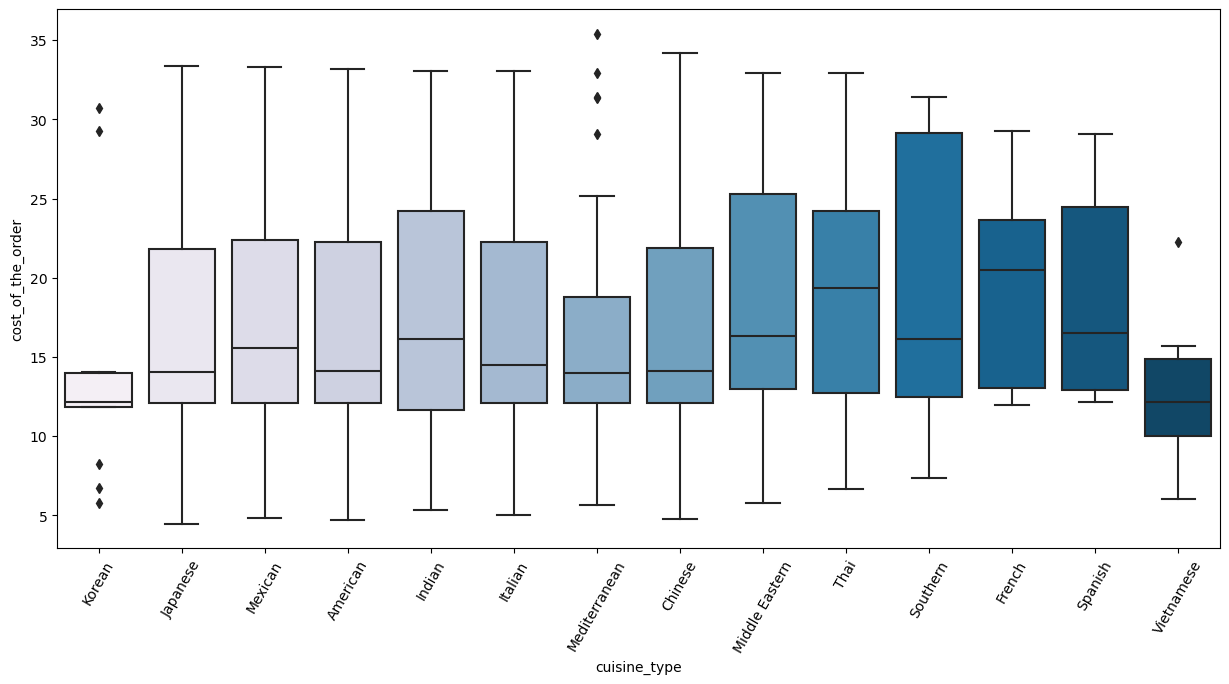

In [330]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()

#### Cuisine vs Food Preparation time

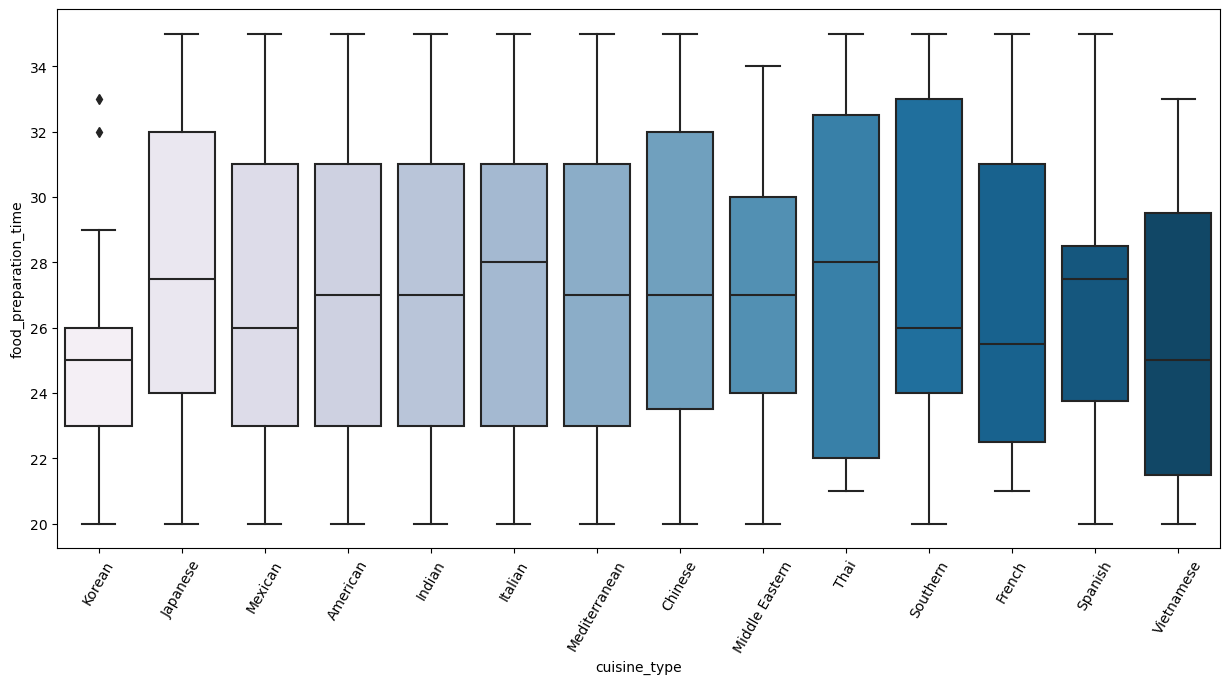

In [331]:
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = df, palette = 'PuBu')  ## Complete the code to visualize the relationship between food preparation time and cuisine type using boxplot
plt.xticks(rotation = 60)
plt.show()

#### Day of the Week vs Delivery time

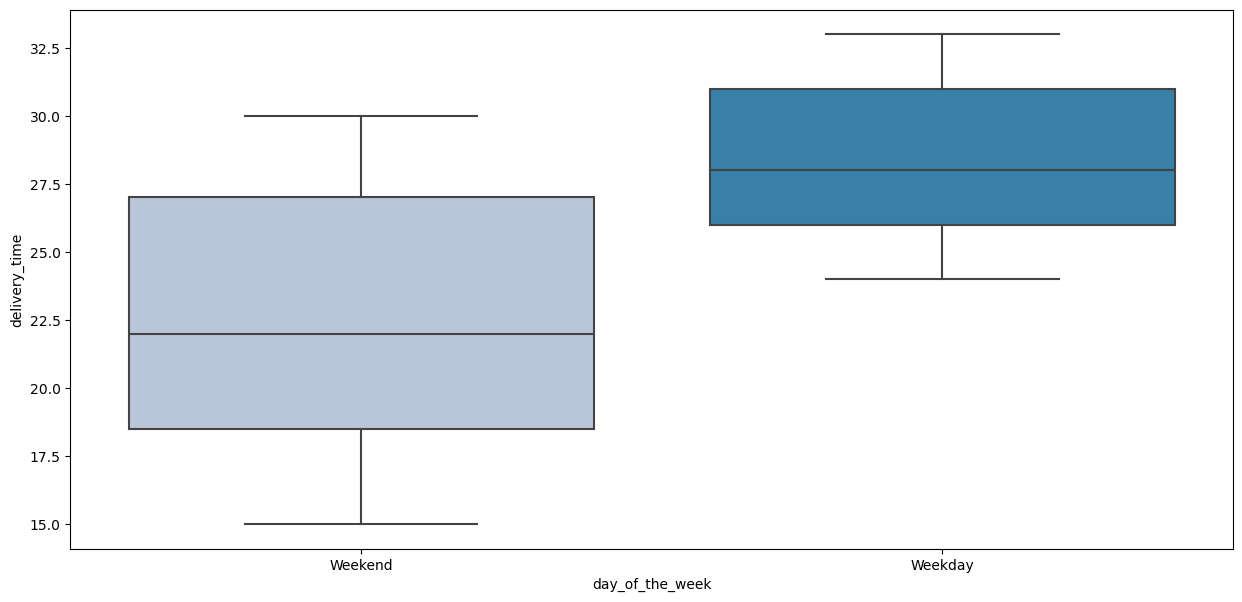

In [293]:
# Relationship between day of the week and delivery time
plt.figure(figsize=(15,7))
sns.boxplot(x = "day_of_the_week", y = "delivery_time", data = df, palette = 'PuBu')  ## Complete the code to visualize the relationship between day of the week and delivery time using boxplot
plt.show()

#### Run the below code and write your observations on the revenue generated by the restaurants.

In [294]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)

restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Rubirosa                          660.45
Sushi of Gari 46                  640.87
Nobu Next Door                    623.67
Five Guys Burgers and Fries       506.47
Name: cost_of_the_order, dtype: float64

#### Rating vs Delivery time

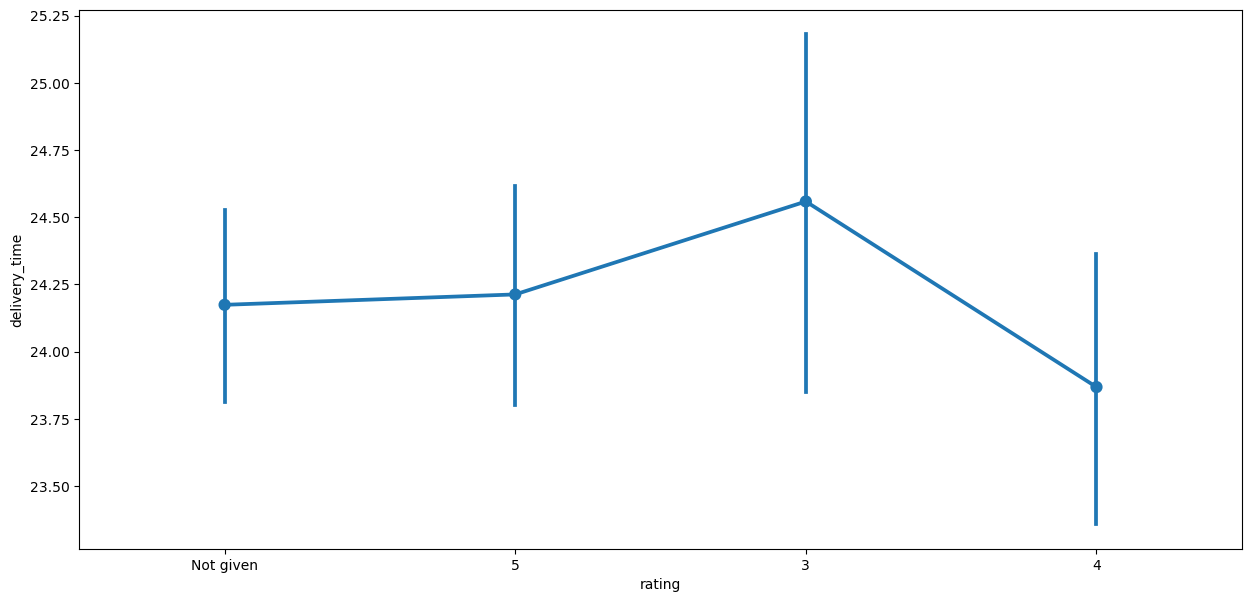

In [295]:
# Relationship between rating and delivery time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

#### Rating vs Food preparation time

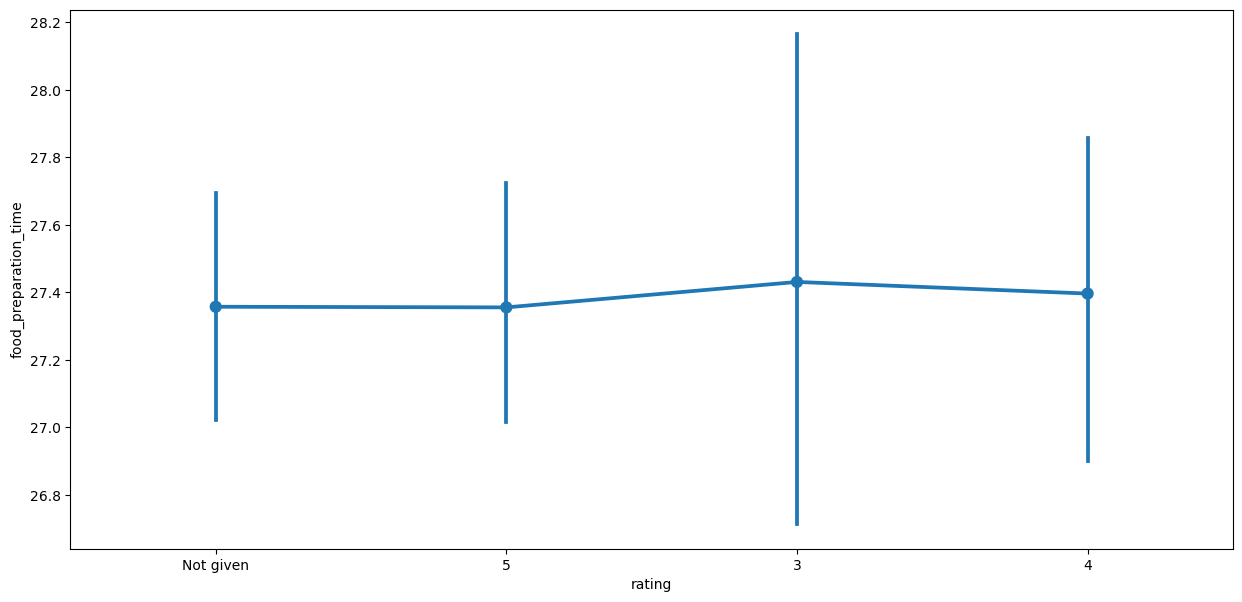

In [296]:
# Relationship between rating and food preparation time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'food_preparation_time', data = df)  ## Complete the code to visualize the relationship between rating and food preparation time using pointplot
plt.show()

#### Rating vs Cost of the order

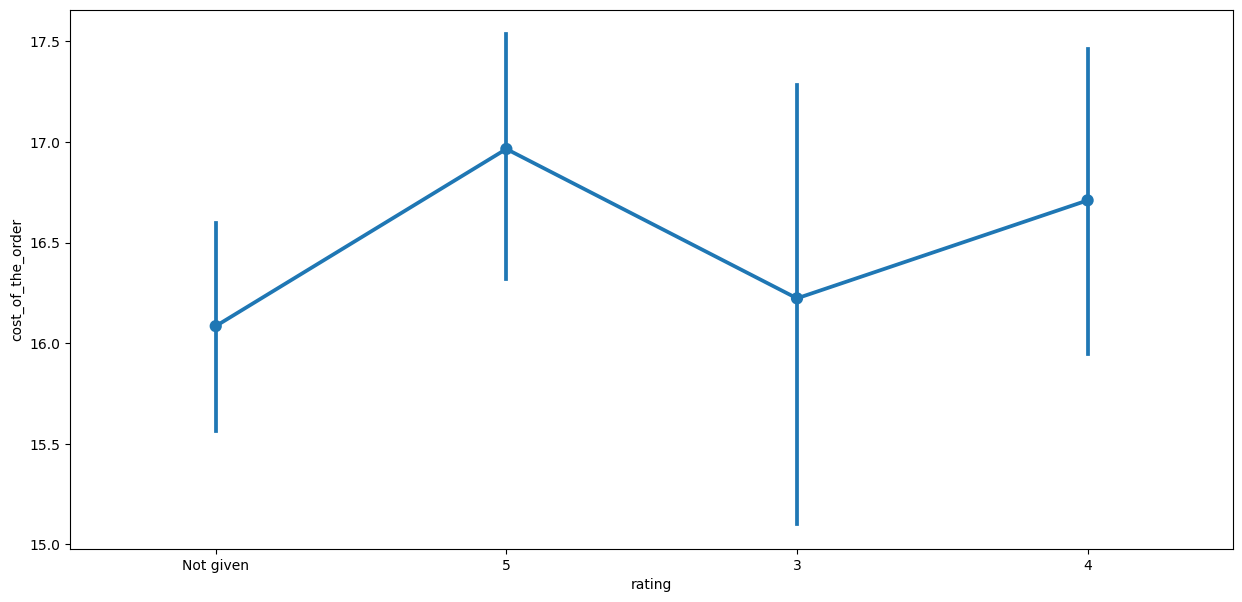

In [297]:
# Relationship between rating and cost of the order
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'cost_of_the_order', data = df)   ## Complete the code to visualize the relationship between rating and cost of the order using pointplot
plt.show()

#### Correlation among variables

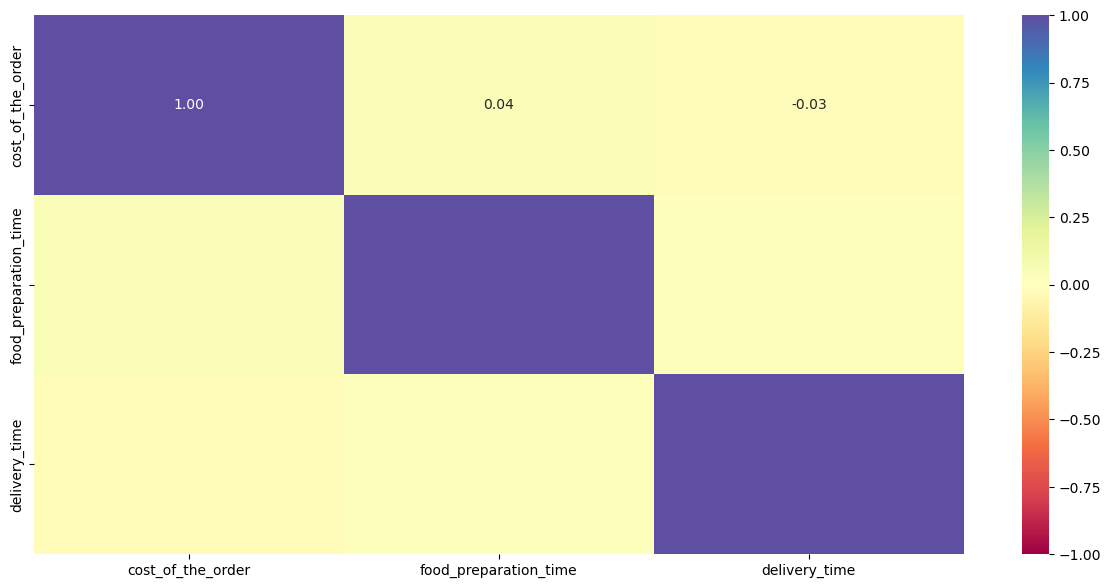

In [298]:
# Plot the heatmap
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [299]:
# Filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')

# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head()

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [300]:


rest_names =df_rating_count.iloc[[0,1,2,3]]['restaurant_name']

# Filter to get the data of restaurants that have rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

# Group the restaurant names with their ratings and find the mean rating of each restaurant

df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna() ## Complete the code to find the mean rating



,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [301]:
#function to determine the revenue
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

df['Revenue'] = df['cost_of_the_order'].apply(compute_rev) ## Write the apprpriate column name to compute the revenue
df.head().sum()

order_id                                                           7387485
customer_id                                                         945969
restaurant_name          HangawiBlue Ribbon Sushi IzakayaCafe HabanaBlu...
cuisine_type                         KoreanJapaneseMexicanAmericanAmerican
cost_of_the_order                                                    95.85
day_of_the_week                        WeekendWeekendWeekdayWeekendWeekday
rating                                               Not givenNot given534
food_preparation_time                                                  123
delivery_time                                                          110
Revenue                                                            20.3725
dtype: object

In [302]:
# get the total revenue and print it
total_rev = df['Revenue'].sum() ## Write the appropriate function to get the total revenue
print('The net revenue is around', round(total_rev, 2), 'dollars')

The net revenue is around 6166.3 dollars


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.)[2 marks]


In [303]:
# Calculate total delivery time and add a new column to the dataframe df to store the total delivery time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']


## Write the code below to find the percentage of orders that have more than 60 minutes of total delivery time (see Question 9 for reference)

# Get orders that take more than 60 minutes to get delivered
df_greater_than_60 = df[df['total_time']>60] 

# Calculate the number of total time required to deliver food
print('The number of total orders that take more than 60 minutes is:', df_greater_than_60.shape[0])

# Calculate percentage of such orders in the dataset
percentage = (df_greater_than_60.shape[0] / df.shape[0]) * 100

print("Percentage of orders that take more than 60 minutes to get delivered from the time the order is placed is ", round(percentage, 2), '%')



The number of total orders that take more than 60 minutes is: 200
Percentage of orders that take more than 60 minutes to get delivered from the time the order is placed is  10.54 %


In [304]:
df.head(5)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue,total_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385,49


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [305]:
# Get the mean delivery time on weekdays and print it
print('The mean delivery time on weekdays is around',
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes')


## Write the code below to get the mean delivery time on weekends and print it
print('The mean delivery time on weekends is around',
      round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),
     'minutes')






The mean delivery time on weekdays is around 28 minutes
The mean delivery time on weekends is around 22 minutes


### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

After conducting a survey on the data from orders placed by registered customers through their online portal, I have drawn several conclusions based on the collected information.

A total of 1,898 orders were made by registered customers from 178 different restaurants, offering 14 unique types of cuisine. Customers had the option to rate the restaurant from which they ordered on a scale of 1 to 5.

Based on the analysis, the following conclusions can be drawn:

Food Preparation Time: The average time required for food preparation after an order is placed is 27 minutes. The minimum preparation time is 20 minutes, while the maximum is 35 minutes.

Most Popular Restaurant: Shake Shack is the most frequented restaurant, receiving 178 out of the 1,898 total orders.

Customer Ratings: Among the 1,898 respondents, 588 awarded the maximum rating of 5, 388 rated their experience as 4, and 188 provided a rating lower than 4. The absence of ratings from 736 individuals may be attributed to time constraints or a deliberate choice not to rate, rather than dissatisfaction with the service.

Delivery Time and Customer Satisfaction: Delivery time significantly influences customer satisfaction and impacts ratings. Analysis indicates an inverse relationship between delivery time and ratings; orders with higher ratings (4 and 5) generally had shorter delivery times. This suggests that customers are more likely to rate their experience positively when their orders arrive promptly.

Cuisine Preferences: American cuisine is the most demanded, closely followed by Japanese cuisine, while Vietnamese cuisine is the least popular.

Order Preparation and Delivery Times: Most orders are prepared within a 20 to 22-minute time frame. The shortest preparation time is 20 minutes, the average is 27 minutes, and the longest is 35 minutes. The majority of deliveries occur between 27 and 30 minutes, with the average delivery time being 24 minutes and 16 seconds.

Order Costs: The highest number of respondents had order costs ranging between 10 and 15 dollars. The distribution of order costs is slightly positively skewed, with most costs falling between 10 and 15 dollars. The least expensive order was less than 5 dollars, while the most expensive order exceeded 5 dollars.


Order Volume by Day: The weekend experienced more than twice as many online orders as weekdays.

Restaurant Performance: Shake Shack leads with the highest number of orders, recording 219 deliveries, nearly double that of the second most ordered restaurant, The Meatball Shop.

Regarding preparation times, all cuisines (except Thai and French) have a minimum preparation time of 20 minutes. For American cuisine, 50% of orders are prepared in 27 minutes or less. Korean cuisine has a maximum preparation time of 27 minutes, with only two instances exceeding this duration (32 minutes and 33 minutes), which should be investigated as outliers. American cuisine whic is the most frequently ordered, typically takes between 25 and 31 minutes to prepare. Japanese cuisine generally takes slightly longer, with most orders being prepared between 24 and 32 minutes.



Promotional Offers: Shake Shack, The Meatball Shop, Blue Ribbon Sushi, and Blue Ribbon Fried Chicken have received more than 50 ratings with an average rating greater than 4, qualifying them for proposed promotional offers.

### Recommendations:


I recommend that the company requires delivery personnel to politely request a rating from customers, emphasising the importance of their feedback. In cases where the delivery person is unable to access the customer after the delivery, a reminder should be sent via email or SMS, encouraging the customer to rate their experience.

Furthermore, I urge the company to proceed with the proposed promotional offers for the identified restaurants. Restaurants with frequent ratings are likely more successful in motivating their customers to provide feedback, which is crucial for continuous improvement and for retaining their customer base.

Additionally, I propose that customers who consistently provide ratings be rewarded with branded items, such as towels, mugs, or water bottles, during holiday periods. They should also be entered into a raffle to win a 100 dollars voucher during the promotional period.

I also advocate for a detailed discussion between the company and the restaurant management to address the factors contributing to longer food preparation times. This discussion should include recommendations for optimising kitchen processes, recruiting more experienced staff, enhancing staff training, and improving resource management. Implementing these measures can enhance customer satisfaction and lead to higher ratings.

Since the Delivery Times on Weekends have higher median delivery times due to increased order volumes. i will suggests a need for the company to consider increasing staff, enhancing logistics, and maintaining frequent communication with customers regarding potential delays.

I recommend that greater emphasis be placed on reducing food preparation times for the two most ordered cuisines, American and Japanese, to improve service quality and customer satisfaction. 

---